# Task

**Задание**

**Цель:** изучить применение дерева решений в рамках задачи регрессии

**Описание задания:**

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

**Этапы работы:**

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

Проведите первичный анализ.

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

Обучите модель регрессии на обучающем множестве.

Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

Обучите дерево решений на обучающем множестве.

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

a. Повторите п. 5 для полученной модели.

Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.

b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?


# Library

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import GridSearchCV


In [96]:
SEED = 42

# Load data

In [97]:
dataset = fetch_california_housing()
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# EDA and preprocessing

Проверим пропуски

In [98]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [99]:
sum(pd.isnull(y))

0

Пропусков нет

Нормализуем признак MedInc

In [100]:
scaler = StandardScaler()
X['MedInc'] = scaler.fit_transform(X[['MedInc']])

Разделим выборку на обучающую и тестовую

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# LinearRegression

In [102]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.5757877060324497

# DecisionTreeRegressor

In [103]:
dtr = DecisionTreeRegressor(random_state=SEED).fit(X_train, y_train)
dtr.score(X_test, y_test)

0.622075845135081

In [104]:
dtr.get_depth()

34

Использовать для визуализации дерево глубиной 34 не самая лучшая идея. Обучим дерево глубиной 3 и посмотрим как происходит визуализация

In [115]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=SEED).fit(X_train, y_train)
dtr_3.score(X_test, y_test)

0.5097629887358219

In [109]:
viz = dtreeviz(dtr_3,
               X_test, 
               y_test, 
               target_name='MedHouseVal', 
               orientation ='LR',
               feature_names=X_test.columns,
               )           
viz

Output hidden; open in https://colab.research.google.com to view.

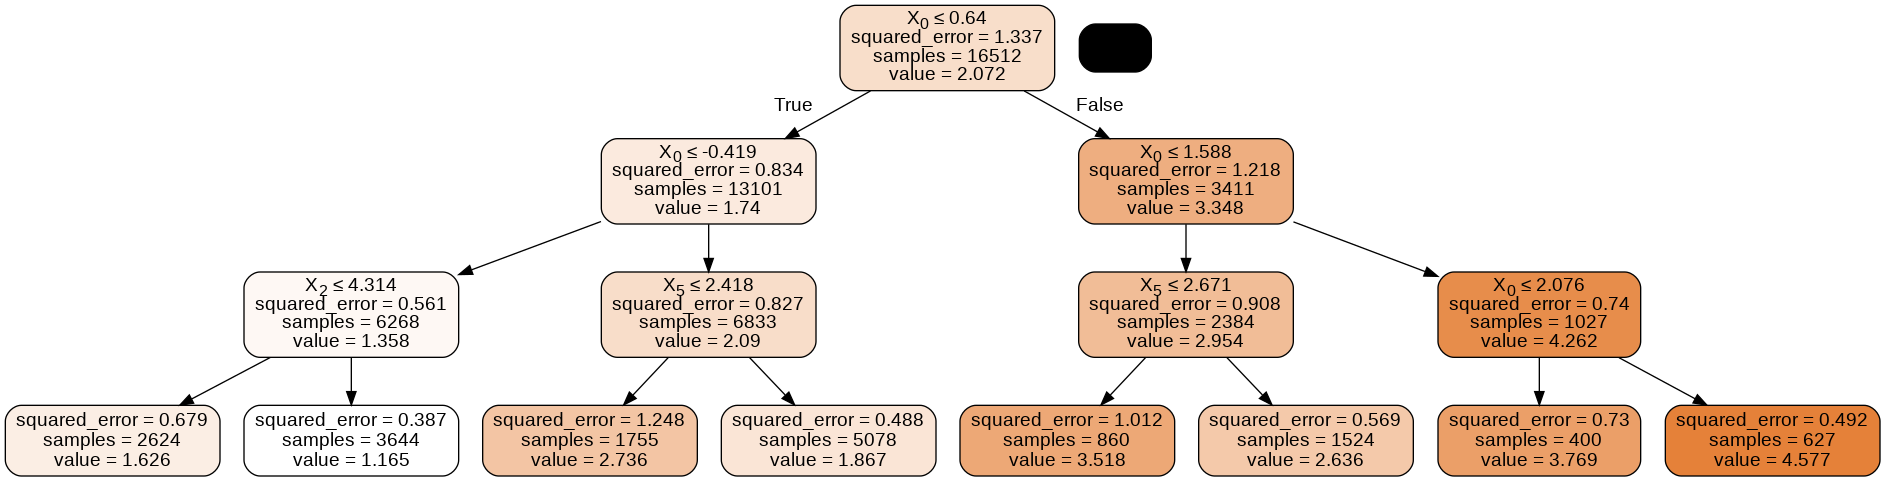

In [116]:
dot_data = StringIO()
export_graphviz(dtr_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Оптимизируем глубину дерева (max_depth) и минимальное количество выборок, необходимых для нахождения в конечном узле (min_samples_leaf)

In [140]:
parameters = {'min_samples_leaf': range(1, 100, 10),
              'max_depth': range(1, 100, 10),
              }
dtr = DecisionTreeRegressor(random_state=SEED)
grid = GridSearchCV(dtr, parameters, scoring='r2', cv=3, refit=True, verbose=1)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 100, 10),
                         'min_samples_leaf': range(1, 100, 10)},
             scoring='r2', verbose=1)

In [143]:
grid.best_params_, grid.best_estimator_

({'max_depth': 21, 'min_samples_leaf': 21},
 DecisionTreeRegressor(max_depth=21, min_samples_leaf=21, random_state=42))

In [144]:
grid.score(X_test, y_test)

0.7281476385406436

# Summary

а) Метрика качества существенно выросла после оптимизации параметров модели, однако поиск оптимальных параметров требует значительных вычичслительных мощностей - особенно это будет заметно на больших выборках

б) Решение задачи регрессии с помощью решающих деревьев имеет смысл только при уверенности, что реальные данные будут находиться в диапозоне данных использованных при обучении. Валидная экстрополяция для этой модели не возможна. Я вижу применение решающих задач в большей степени для задач классификации, в первую очередь по причине простоты и интуитивной понятности разделения данных на классы

# Literature

1. https://mljar.com/blog/visualize-decision-tree/
